In [ ]:
#library(MCMCpack)

In [1]:
source("Distance_Functions.r")
library(reshape2)

library(kernlab)
library(MASS)
library(MVA)
library(vegan)

library(maps)
library(ggmap)
library(mapproj)


Loading required package: HSAUR2
Loading required package: tools
Warning message:
“package ‘vegan’ was built under R version 3.4.3”Loading required package: permute

Attaching package: ‘permute’

The following object is masked from ‘package:kernlab’:

    how

Loading required package: lattice
This is vegan 2.4-6
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:kernlab’:

    alpha

Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.


In [2]:
#create dataframe containing all locations and their long/lat
#lat = y, long = x

Map <- get_map(location = c(lon = 12, lat = 45), zoom = 5)

locations <- c()

#Germanic dialect group
locations[["Aqu"]] <- "45.769725, 13.371192"
locations[["Ger1"]] <- "51.3, 6.85"
locations[["Ger2"]] <- "51.3, 6.85"
locations[["Klo"]] <- "48.304167, 16.316667"

#Central dialect group
locations[["Arne"]] <- "43.1864, 0.5061"
locations[["Aux"]] <- "47.7986, 3.5672"
locations[["Che"]] <- "48.8833, 2.6"
locations[["Dij"]] <- "47.2906, 5.0428"
locations[["Nev"]] <- "46.9933, 3.1572"
locations[["NIt"]] <- "45.466667, 9.183333"
locations[["Paris"]] <- "48.8567, 2.3508"
locations[["Rou"]] <- "49.44, 1.1"
locations[["Rou1"]] <- "49.44, 1.1"
locations[["Rou2"]] <- "49.44, 1.1"
locations[["Sens"]] <- "48.1975, 3.2877"
locations[["Ven"]] <- "45.4375, 12.335833"

#Southwestern dialect group
locations[["Ben"]] <- "41.133333, 14.783333"
locations[["Gai"]] <- "43.9014, 1.8992"
locations[["MCa"]] <- "41.4916, 13.8159"
locations[["St. Yrieix"]] <- "45.5153, 1.2042"

#Roman Chant
locations[["Rome1"]] <- "41.887556, 12.475892"
locations[["Rome2"]] <- "41.885833, 12.505556"
locations[["Rome3"]] <- "41.902222, 12.453333"

#Ambrosian Chant
locations[["Amb1"]] <- "45.4631, 9.1854"
locations[["Amb2"]] <- "45.4631, 9.1854"
locations[["Amb3"]] <- "45.4631, 9.1854"
locations[["VimA"]] <- "45.616667, 9.366667"
locations[["VimB"]] <- "45.616667, 9.366667"
locations[["VimC"]] <- "45.616667, 9.366667"
locations[["VimD"]] <- "45.616667, 9.366667"

locations <- as.data.frame(locations)
coordinates <- data.frame(do.call('rbind', strsplit(as.character(locations$locations),', ',fixed=TRUE)))

options(digits=6)
df <- cbind(locations, coordinates)
df <- df[c("X1", "X2")]
colnames(df) <- c("latitude", "longitude")
df$longitude <- as.numeric(as.character(df$longitude))
df$latitude <- as.numeric(as.character(df$latitude))
location_frame <- df

Source : https://maps.googleapis.com/maps/api/staticmap?center=45,12&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN


In [17]:
use_loc = c("Aqu", "Dij", "Arne", "Nev", "Gai", "MCa", "Rome3", "Ger1", "Sens", "VimA", "Che")


In [4]:
dist_funcs = c(mseMatrix, euclidMatrix, adistMatrix, manMatrix, canMatrix)
dist_funcs_name = c("mse", "euclid", "adist", "manhattan", "canberra")

for (chants in dir("./Chants")){
    #reads in each chant and runs distance metric on each one (i.e. mseLexDomini will be created)
    if (!(chants == 'README.md') & !(chants == 'A Summo Caelo.csv')){
        
        curr_chant = read.csv(file=paste("./Chants/",chants, sep=""), header=TRUE, sep=',')
        
        dist = 1
    
        for (func in dist_funcs){

            assign(paste(dist_funcs_name[dist],gsub(" ","",strsplit(chants,".csv")),sep=""), func(curr_chant))
            
            dist = dist + 1
        }
        dist = 1
    }
}
 
while (dist < 6){
    #creates a full matrix of a distance function on means (i.e. msefullmatrix_mean will be created)
    assign(paste(dist_funcs_name[dist], "fullmat_mean", sep = ""),
                acast(rbind(melt(eval(as.symbol(paste(dist_funcs_name[dist],"BenediciteDominum",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DominusDixit",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"FactusEst",sep="")))),
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"LexDomini",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"NomineDomini",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"Rorate", sep="")))), 
                            #melt(eval(as.symbol(paste(dist_funcs_name[dist],"ASummoCaelo", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"BenedictusDominus", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DeusinAdjutorium", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DicitDominus", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"Victricem", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"SicutOculi", sep=""))))), Var1~Var2, mean))
    
    temp = eval(as.symbol(paste(dist_funcs_name[dist], "fullmat_mean", sep="")))
    #temp[temp==0] <- NA
    
    #diag(temp) <- 0
    
    write.table(temp, file=paste(paste(dist_funcs_name[dist], "_distance/", sep=""), 
                            paste(dist_funcs_name[dist], "fullmat_mean.csv", sep = ""), sep=""))
    dist = dist + 1  
}
dist = 1

while (dist < 6){
    #creates a full matrix of a distance function on medians (i.e. msefullmatrix_median will be created)
    assign(paste(dist_funcs_name[dist], "fullmat_median", sep = ""),
                acast(rbind(melt(eval(as.symbol(paste(dist_funcs_name[dist],"BenediciteDominum",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DominusDixit",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"FactusEst",sep="")))),
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"LexDomini",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"NomineDomini",sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"Rorate", sep="")))), 
                            #melt(eval(as.symbol(paste(dist_funcs_name[dist],"ASummoCaelo", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"BenedictusDominus", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DeusinAdjutorium", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"DicitDominus", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"Victricem", sep="")))), 
                            melt(eval(as.symbol(paste(dist_funcs_name[dist],"SicutOculi", sep=""))))), Var1~Var2, median))
    
    temp = eval(as.symbol(paste(dist_funcs_name[dist], "fullmat_median", sep="")))
    #temp[temp==0] <- NA
    
    #diag(temp) <- 0
    
    write.table(temp, file=paste(paste(dist_funcs_name[dist], "_distance/", sep=""), 
                            paste(dist_funcs_name[dist], "fullmat_median.csv", sep = ""), sep=""))
    dist = dist + 1  
}

In [5]:
dist_folders = dir(path=".", pattern="_distance")
dist_folders <- dist_folders[dist_folders != "pearson_distance"]
#dist_folders
#creates directory access to all distance functions except pearson

for(i in 1:length(dist_folders)){
    file.remove(paste(dist_folders[i],"/", dir(dist_folders[i], pattern=".pdf"), sep=""))
}

#removes any pdf files prior to running code below 

In [22]:
## KPCA
for(i in 1:length(dist_folders)){
    #for each distance metric
    
    mean_median_list = list.files(path=paste(dist_folders[i], "/", sep=""), pattern = "_me")
    mean_median_list = mean_median_list[grepl("\\.csv", mean_median_list)]
    #list of both full matrix in mean , full matrix in median of this distance metric of current directory
    
    for (mat in mean_median_list){
        
        curr_matrix <- read.table(paste(dist_folders[i],"/", mat, sep=""))
        #set the current matrix to be the distance metric/ full matrix (mean/median)
        
        temp <- data.frame(curr_matrix)
        temp <- temp[use_loc,use_loc]
        #temp[is.na(temp)] <- 0
        #replace all NA with 0's to be able to run kpca
        
        loc_curr = location_frame[row.names(temp),]
        #location of chants in the current matrix being run 

        pca <- pcv(kpca(~.,temp, kernel="rbfdot",kpar=list(sigma=0.2),features=2))
        #get 2 components of temp
        
        pro <- procrustes(loc_curr, pca, scale = TRUE)
        #run procrustes analysis
        
        for (r in 1:nrow(pca)){
            pro$Y[r,] = pro$Y[r,] + pro$translation
        }
        #translate all produced kpca vectors into approximated real world location
        
        temp = pro$Y[,2] 
        pro$Y[,2] = pro$Y[,1]
        pro$Y[,1] = temp
        #swap the columns so we have long, lat
        
        row.names(pro$Y) <- row.names(loc_curr)
        colnames(pro$Y) <- c("longitude", "latitude")
        #add row names and columns to match real location (loc_curr)
        
        pro$Y <- data.frame(pro$Y) #convert to dataframe so it can be plotted   
        
        dat <- rbind(loc_curr, pro$Y)

        dat$dataset <- factor(c(rep("real_location", dim(pro$Y)[1]), rep("predicted", dim(loc_curr)[1])))
        
        
        
        pdf(paste(dist_folders[i], "/", strsplit(mat,".csv"),"_KPCA.pdf", sep="")) #create pdf of plots
        
        print(ggplot(data=dat, aes(x=longitude, y=latitude, color = dataset)) + geom_point() +
            geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2))
        #produces plot
        
        
        print(ggmap(Map) + 
            geom_point(data=dat, aes(x=longitude, y=latitude, color = dataset)) + 
            geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2))

        dev.off()
    }
    
}

In [14]:
##MDS

for(i in 1:length(dist_folders)){
    #for each distance metric
    
    mean_median_list = list.files(path=paste(dist_folders[i], "/", sep=""), pattern = "_me")
    mean_median_list = mean_median_list[grepl("\\.csv", mean_median_list)]
    
    for (mat in mean_median_list){
        
        curr_matrix <- read.table(paste(dist_folders[i],"/", mat, sep=""))
        #set the current matrix to be the distance metric/ full matrix (mean/median)
        
        temp <- data.frame(curr_matrix)
        temp = temp[use_loc, use_loc]
        #temp[is.na(temp)] <- 0 #make sure to come back to this later on!!! 
        #replace all NA with 0's to be able to run kpca
        
        loc_curr = location_frame[row.names(temp),]
        #location of chants in the current matrix being run 

        mds = cmdscale(temp, k=2)
        #get 2 components of temp
        
        pro <- procrustes(loc_curr, mds, scale = TRUE)
        #run procrustes analysis
        
        for (r in 1:nrow(mds)){
            pro$Y[r,] = pro$Y[r,] + pro$translation
        }
        #translate all produced kpca vectors into approximated real world location
        
        temp = pro$Y[,2] 
        pro$Y[,2] = pro$Y[,1]
        pro$Y[,1] = temp
        #swap the columns so we have long, lat
        
        row.names(pro$Y) <- row.names(loc_curr)
        colnames(pro$Y) <- c("longitude", "latitude")
        #add row names and columns to match real location (loc_curr)
        
        pro$Y <- data.frame(pro$Y) #convert to dataframe so it can be plotted   
        
        dat <- rbind(loc_curr, pro$Y)

        dat$dataset <- factor(c(rep("real_location", dim(pro$Y)[1]), rep("predicted", dim(loc_curr)[1])))
        
        
        
        pdf(paste(dist_folders[i], "/", strsplit(mat,".csv"),"_MDS.pdf", sep="")) #create pdf of plots
        
        print(ggplot(data=dat, aes(x=longitude, y=latitude, color = dataset)) + geom_point() +
            geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2))
        #produces plot
        
        
        print(ggmap(Map) + 
            geom_point(data=dat, aes(x=longitude, y=latitude, color = dataset)) + 
            geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2))

        dev.off()
    }
}

In [23]:
pro


Call:
procrustes(X = loc_curr, Y = pca, scale = TRUE) 

Procrustes sum of squares:
 302 


In [ ]:
write.matrix(t, "large_matrix_file.csv", sep=",")

In [9]:
#t
t[use_loc,use_loc]

,Aqu,Dij,Arne,Nev,Gai,MCa,Rome3,Ger1,Sens,VimA,Che
Aqu,0.000,141.500,146.556,138.2727,155.364,146.1818,336.909,78.5000,176.2,309.000,85.0000
Dij,141.500,0.000,130.143,124.0000,126.375,135.1250,353.875,78.0000,187.0,413.667,69.5000
Arne,146.556,130.143,0.000,121.5556,131.111,139.3333,331.556,73.7500,166.0,404.000,56.0000
Nev,138.273,124.000,121.556,0.0000,134.818,126.4545,333.909,80.8333,161.4,305.600,76.0000
Gai,155.364,126.375,131.111,134.8182,0.000,136.3636,329.727,105.0000,169.0,310.200,126.0000
MCa,146.182,135.125,139.333,126.4545,136.364,0.0000,331.273,86.1667,170.0,306.200,89.0000
Rome3,336.909,353.875,331.556,333.9091,329.727,331.2727,0.000,215.5000,450.8,455.000,287.3333
Ger1,78.500,78.000,73.750,80.8333,105.000,86.1667,215.500,0.0000,72.5,151.667,80.6667
Sens,176.200,187.000,166.000,161.4000,169.000,170.0000,450.800,72.5000,0.0,335.500,74.0000
VimA,309.000,413.667,404.000,305.6000,310.200,306.2000,455.000,151.6667,335.5,0.000,167.5000


In [10]:
t = read.table("manhattan_distance//manhattanfullmat_mean.csv")
#t[is.na(t)] <- 0
j = t[use_loc,use_loc]
loc_curr = location_frame[row.names(j),]
mds = cmdscale(j, k=2)

In [11]:
pro$X.new

ERROR: Error in eval(expr, envir, enclos): object 'pro' not found


Source : https://maps.googleapis.com/maps/api/staticmap?center=45,12&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN


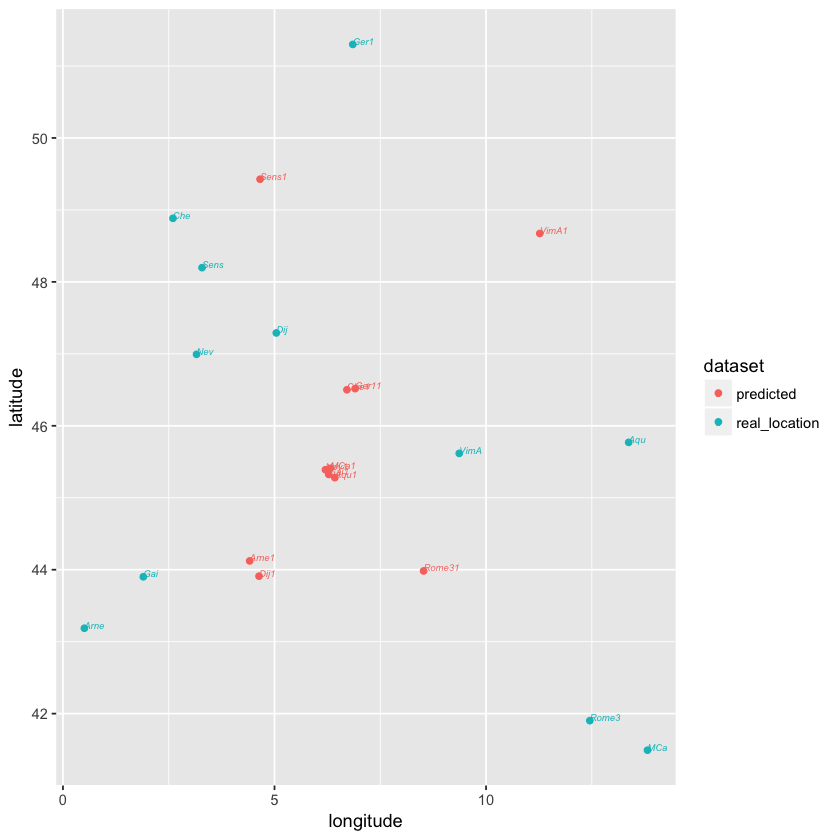

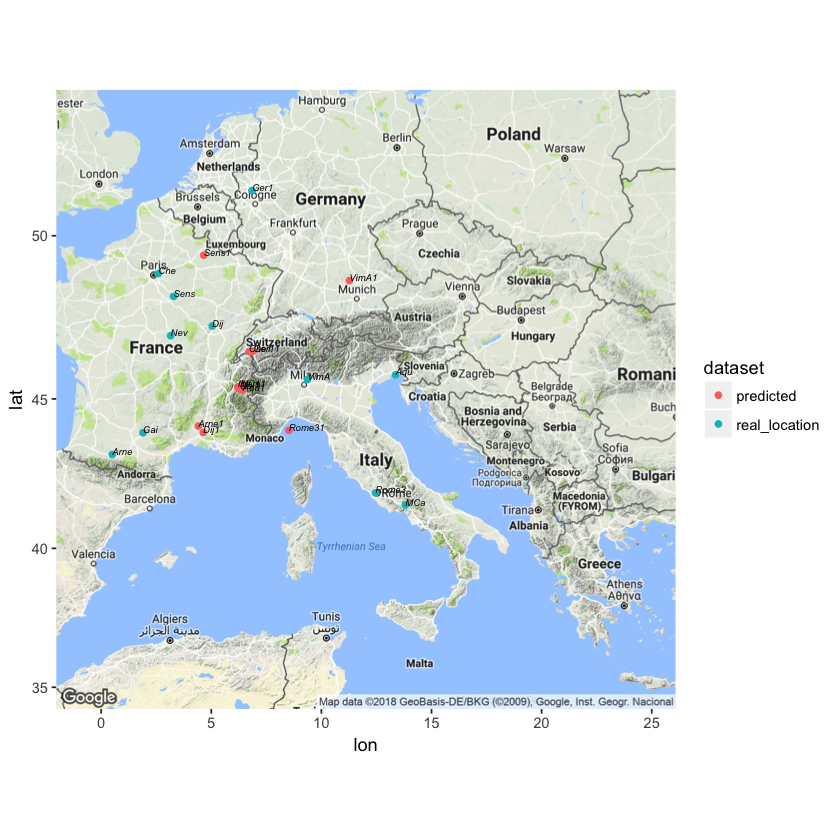

In [13]:
#TESTING

library(maps)
library(ggmap)
library(mapproj)

t = read.table("canberra_distance/canberrafullmat_mean.csv")
#t[is.na(t)] <- 0
j = t[use_loc,use_loc]
loc_curr = location_frame[row.names(j),]
mds = cmdscale(j, k=2)

pro <- procrustes(loc_curr, mds, scale=TRUE)
for (r in 1:nrow(mds)){
    pro$Y[r,] = pro$Y[r,] + pro$translation
}
temp = pro$Y[,2]
pro$Y[,2] = pro$Y[,1]
pro$Y[,1] = temp

row.names(pro$Y) <- row.names(loc_curr)
colnames(pro$Y) <- c("longitude", "latitude")

pro$Y <- data.frame(pro$Y)

#plot(latitude~ longitude, data=loc_curr)
#with(loc_curr, text(latitude~longitude, labels = row.names(data), pos = 1))
#par(new=T)
#plot(latitude ~ longitude, pro$Y, pch = 3, col = "red")
#with(pro$Y, text(latitude~ longitude, labels = row.names(pro$Y),pos = 1))


dat <- rbind(loc_curr, pro$Y)
Map <- get_map(location = c(lon = 12, lat = 45), zoom = 5)
#dat$names <- rownames(dat)

#dat <- rbind(dat1, dat2)
dat$dataset <- factor(c(rep("real_location", dim(pro$Y)[1]), rep("predicted", dim(loc_curr)[1])))

ggplot(data=dat, aes(x=longitude, y=latitude, color = dataset)) + geom_point() +
    geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2)



ggmap(Map) + 
    geom_point(data=dat, aes(x=longitude, y=latitude, color = dataset)) + 
    geom_text(data=dat, aes(x=longitude, y=latitude, label=rownames(dat)), hjust=0, vjust=0, fontface="italic", size=2)




#ggmap(Map) +
#    geom_point(data = df, aes(x = df[,2], y = df[,1], colour = "orchid1")) + 
#    geom_text(data = df, aes(x = df[,2], y = df[,1], label = rownames(df)), 
#          size = 3, vjust = 0, hjust = 0, fontface = "italic" , colour = "indianred1")

In [ ]:
loc_curr

In [ ]:
t1 = read.table("canberra_distance/canberrafullmat_mean.csv")
t2 = read.table("canberra_distance/canberrafullmat_median.csv")
#t[is.na(t)] <- 0
j = t2[rowSums(is.na(t))==0,colSums(is.na(t))==0]
loc_curr = location_frame[row.names(j),]
mds = cmdscale(j, k=2)

pro <- procrustes(loc_curr, mds, scale=TRUE)
for (r in 1:nrow(mds)){
    pro$Y[r,] = pro$Y[r,] + pro$translation
}
temp = pro$Y[,2]
pro$Y[,2] = pro$Y[,1]
pro$Y[,1] = temp

row.names(pro$Y) <- row.names(loc_curr)
colnames(pro$Y) <- c("longitude", "latitude")

pro$Y <- data.frame(pro$Y)

In [ ]:
mds

In [ ]:
loc_curr

In [ ]:
write.table(mds, file = "Canberra_median.csv",sep=",")

In [ ]:
write.table(loc_curr, file = "Actual_canberra_mean.csv",sep=",")